# Details of  Project

We are give the data of lake michigan to predict the lake effect anow.

**Context of lake snow effect:** Lake effect snow is a weather phenomenon that occurs when cold, dry air passes over a relatively warmer body of water, such as a lake or ocean, and picks up moisture from the water. As the moisture-laden air moves over land, it cools and the moisture in the air condenses, resulting in heavy snowfall downwind of the water body.
The amount of snowfall can be significant, sometimes measured in feet, and the intensity of the snowfall can vary from light flurries to intense snow squalls. Lake effect snow is most common in the Great Lakes region of North America, but can occur anywhere there is a large body of relatively warm water and cold, dry air. The lake effect snow can have a significant impact on local weather conditions.

So, with the data we're going to predict the snowfall using different parameters of satellite imagery and meterological data we need to predict the snowfall.

# **Purpose:**
with the data we're going to predict the snowfall using different parameters of satellite imagery and meterological data we need to predict the snowfall.

Import necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
import ast

In [2]:
# Set the data directory path
DATA_dir = ''

# Read in the 'lat_long_1D_labels_for_plotting.csv' file using pandas
df_lat_lon = df_lat_lon = pd.read_csv(DATA_dir + 'lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

,latitude,longitude
0,41.78,-87.54
1,41.78,-87.50
2,41.78,-87.46
3,41.78,-87.42
4,41.78,-87.38


The shape attribute of the df_lat_lon DataFrame to get the dimensions of the data.

In [3]:
df_lat_lon.shape

(3599, 2)

The following code cell reads in a CSV file called '2006Fall_2017Spring_GOES_meteo_combined.csv' using the `read_csv()` function from pandas. The file is located in the `DATA_dir` directory, which was set to an empty string in the previous cell.

The resulting data is assigned to a new pandas DataFrame called `df_data`. 

To display the first 5 rows of the DataFrame and verify that it has been read in correctly, the `head()` function is used

In [4]:
df_data = pd.read_csv(DATA_dir + '2006Fall_2017Spring_GOES_meteo_combined.csv')
df_data.head(5)

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,18:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",51,92,...,3700,m,m,10,984.4,1007.20,1007.10,0.00,NC,NC
1,2006-10-01,01:00,2006-09-30,19:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,96,...,3700,m,m,10,984.7,1007.80,1007.50,0.00,NC,NC
2,2006-10-01,02:00,2006-09-30,20:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",49,92,...,3700,m,m,10,985.4,1008.30,1008.10,0.00,NC,NC
3,2006-10-01,03:00,2006-09-30,21:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,100,...,2500,6500,m,6,986.0,M,1008.80,0.02,NC,NC
4,2006-10-01,04:00,2006-09-30,22:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",50,92,...,7000,m,m,8,986.4,1009.50,1009.10,0.00,NC,NC


The following code cell gets the column names of the `df_data` DataFrame using the `columns` attribute and converts it to a list using the `tolist()` function. The resulting list is then assigned to a new variable called `column_names`.


In [5]:
column_names = df_data.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


By calling data_sample, we are simply printing the value to the output, which can be useful for inspecting individual data points in the DataFrame.

In [6]:
data_sample = df_data['Lake_data_1D'][16]
data_sample

'[0.0725, 0.067499995, 0.07, 0.07, 0.067499995, 0.067499995, 0.065, 0.067499995, 0.07, 0.0625, 0.0625, 0.06, 0.0625, 0.055, 0.067499995, 0.055, 0.065, 0.07, 0.065, 0.0725, 0.0775, 0.0625, 0.067499995, 0.0625, 0.065, 0.067499995, 0.0625, 0.0625, 0.06, 0.0625, 0.0625, 0.065, 0.06, 0.06, 0.0625, 0.0625, 0.067499995, 0.067499995, 0.067499995, 0.067499995, 0.0775, 0.074999996, 0.067499995, 0.065, 0.049999997, 0.049999997, 0.067499995, 0.067499995, 0.055, 0.055, 0.0725, 0.067499995, 0.065, 0.0625, 0.065, 0.0625, 0.065, 0.057499997, 0.065, 0.0725, 0.0625, 0.0625, 0.065, 0.07, 0.067499995, 0.0625, 0.057499997, 0.055, 0.0625, 0.074999996, 0.055, 0.06, 0.0625, 0.067499995, 0.057499997, 0.0625, 0.067499995, 0.065, 0.057499997, 0.065, 0.0625, 0.0625, 0.067499995, 0.06, 0.0625, 0.067499995, 0.065, 0.085, 0.067499995, 0.082499996, 0.057499997, 0.0625, 0.055, 0.06, 0.067499995, 0.057499997, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.055, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.057499997, 0.06749

list is assigned to a new variable called data_sample_lst, and calling data_sample_lst simply prints the list to the output.

In [7]:
import ast

data_sample_lst = ast.literal_eval(data_sample)
data_sample_lst

[0.0725,
 0.067499995,
 0.07,
 0.07,
 0.067499995,
 0.067499995,
 0.065,
 0.067499995,
 0.07,
 0.0625,
 0.0625,
 0.06,
 0.0625,
 0.055,
 0.067499995,
 0.055,
 0.065,
 0.07,
 0.065,
 0.0725,
 0.0775,
 0.0625,
 0.067499995,
 0.0625,
 0.065,
 0.067499995,
 0.0625,
 0.0625,
 0.06,
 0.0625,
 0.0625,
 0.065,
 0.06,
 0.06,
 0.0625,
 0.0625,
 0.067499995,
 0.067499995,
 0.067499995,
 0.067499995,
 0.0775,
 0.074999996,
 0.067499995,
 0.065,
 0.049999997,
 0.049999997,
 0.067499995,
 0.067499995,
 0.055,
 0.055,
 0.0725,
 0.067499995,
 0.065,
 0.0625,
 0.065,
 0.0625,
 0.065,
 0.057499997,
 0.065,
 0.0725,
 0.0625,
 0.0625,
 0.065,
 0.07,
 0.067499995,
 0.0625,
 0.057499997,
 0.055,
 0.0625,
 0.074999996,
 0.055,
 0.06,
 0.0625,
 0.067499995,
 0.057499997,
 0.0625,
 0.067499995,
 0.065,
 0.057499997,
 0.065,
 0.0625,
 0.0625,
 0.067499995,
 0.06,
 0.0625,
 0.067499995,
 0.065,
 0.085,
 0.067499995,
 0.082499996,
 0.057499997,
 0.0625,
 0.055,
 0.06,
 0.067499995,
 0.057499997,
 0.065,
 0.0625,


 list is assigned to a new variable called lat_lst, and calling lat_lst simply prints the list to the output.

In [8]:
lat_lst = df_lat_lon['latitude'].to_list()
lat_lst

[41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.78,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.82,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.86,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.9,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.94,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 41.98,
 

 list is assigned to a new variable called lon_lst, and calling lon_lst simply prints the list to the output.

In [9]:
lon_lst = df_lat_lon['longitude'].to_list()
lon_lst

[-87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -87.58,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -86.7,
 -87.58,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -86.7,
 -86.66,
 -86.62,
 -87.62,
 -87.58,
 -87.54,
 -87.5,
 -87.46,
 -87.42,
 -87.38,
 -87.34,
 -87.3,
 -87.26,
 -87.22,
 -87.18,
 -87.14,
 -87.1,
 -87.06,
 -87.02,
 -86.98,
 -86.94,
 -86.9,
 -86.86,
 -86.82,
 -86.78,
 -86.74,
 -86.7,
 -86.66,
 -86.6

In [10]:
# Make sure they have same len

print(len(data_sample_lst))
print(len(lat_lst))
print(len(lon_lst))

3599
3599
3599


`Inputs`:

1. lat, `Array[<float>]`
    
    This is a list of floating point numbers that contains the necessary index values for latitude.
    
    
2. lon, `Array[<float>]`
    
    This is a list of floating point numbers that contains the necessary index values for longitude.
    
    
3. val, `Array[<float>]`
    
    This is a list of floating point numbers that contains the necessary intensity values for cloud pixels.
    
    
4. fig_name, `<String>`
    
    This is a string representing the file name of the output image, excluding the .png extension.
 

`Output`:

1. status_code, `<Integer>`

    This is an integer value where `0` indicates that the function was able to successfully output the image file, and `255` indicates that the function failed to execute due to mismatched lengths in the lat, lon, and val inputs. 

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.express as px
def arrays_2_png(lat, lon, val, fig_name):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        plt.savefig(fig_name+'.png')
        status_code = 0
    else:
        status_code = 255

    return status_code

0

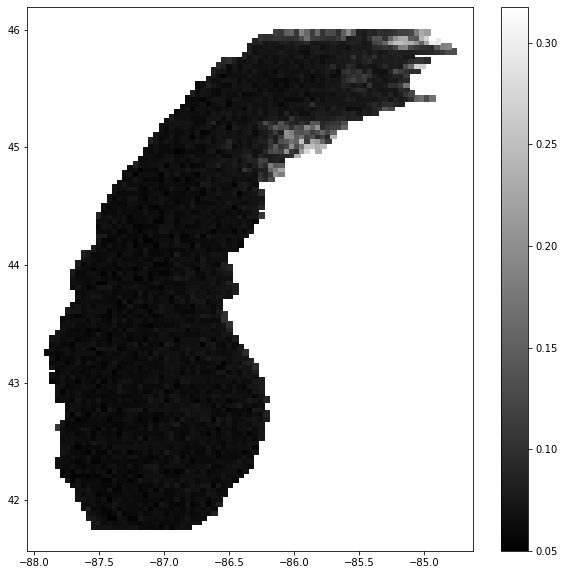

In [12]:
from array import array

return_code = arrays_2_png(lat_lst, lon_lst, data_sample_lst, 'sample')
return_code

In [13]:
df_data.head(20)

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,18:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",51,92,...,3700,m,m,10,984.4,1007.20,1007.10,0.00,NC,NC
1,2006-10-01,01:00,2006-09-30,19:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,96,...,3700,m,m,10,984.7,1007.80,1007.50,0.00,NC,NC
2,2006-10-01,02:00,2006-09-30,20:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",49,92,...,3700,m,m,10,985.4,1008.30,1008.10,0.00,NC,NC
3,2006-10-01,03:00,2006-09-30,21:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,100,...,2500,6500,m,6,986.0,M,1008.80,0.02,NC,NC
4,2006-10-01,04:00,2006-09-30,22:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",50,92,...,7000,m,m,8,986.4,1009.50,1009.10,0.00,NC,NC
5,2006-10-01,05:00,2006-09-30,23:00,goes11.2006.10.01.0500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0500.v01.nc-var1-t0.csv.csv,"[nan, nan, 0.0075, nan, nan, 0.0025, 0.0025, 0...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",49,96,...,7000,m,m,7,986.7,1009.80,1009.50,0.00,NC,NC
6,2006-10-01,06:00,2006-10-01,00:00,goes11.2006.10.01.0600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0600.v01.nc-var1-t0.csv.csv,"[nan, 0.0, 0.0075, 0.005, 0.0025, 0.005, 0.005...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",50,92,...,6500,m,m,9,987.3,1010.20,1010.20,0.01,NC,NC
7,2006-10-01,07:00,2006-10-01,01:00,goes11.2006.10.01.0700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0700.v01.nc-var1-t0.csv.csv,"[nan, 0.0025, 0.005, 0.0025, nan, nan, nan, 0....","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,92,...,0,m,m,9,988.0,1010.80,1010.80,0.00,NC,NC
8,2006-10-01,08:00,2006-10-01,02:00,None,None,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[nan],45,100,...,M,m,m,5,988.3,M,1011.20,m,NC,NC
9,2006-10-01,09:00,2006-10-01,03:00,None,None,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[nan],43,100,...,4200,m,m,5,989.0,M,1011.90,m,NC,NC


We can see that there are 2 time zones UTC & CST. The CST seems reliable and most accurate. As we can see above in 19th row the time as per UTC is 7pm(19:00) and 1pm(13:00)previous day in CST(The gap is basically 18 hours). Let's read the values of ```Lake_data_1D``` day and night time as per cst and check for nan.

In [14]:
df_data['Lake_data_1D'][19] #time here is 1pm afternoon in CST

'[0.0925, 0.095, 0.0925, 0.074999996, 0.0875, 0.0875, 0.089999996, 0.0875, 0.089999996, 0.0875, 0.085, 0.0875, 0.089999996, 0.0875, 0.08, 0.082499996, 0.0875, 0.082499996, 0.0875, 0.095, 0.095, 0.0925, 0.095, 0.0875, 0.082499996, 0.0925, 0.082499996, 0.089999996, 0.0875, 0.08, 0.0875, 0.0875, 0.0875, 0.0875, 0.0875, 0.082499996, 0.0875, 0.0775, 0.085, 0.0875, 0.089999996, 0.0975, 0.095, 0.089999996, 0.082499996, 0.0925, 0.095, 0.089999996, 0.0875, 0.0875, 0.0775, 0.085, 0.082499996, 0.089999996, 0.082499996, 0.0875, 0.082499996, 0.082499996, 0.0775, 0.0875, 0.0875, 0.095, 0.085, 0.095, 0.095, 0.089999996, 0.095, 0.0875, 0.095, 0.0875, 0.0875, 0.0875, 0.0875, 0.085, 0.0925, 0.082499996, 0.0925, 0.085, 0.0775, 0.095, 0.085, 0.082499996, 0.0875, 0.0875, 0.089999996, 0.0875, 0.0875, 0.12, 0.1025, 0.095, 0.095, 0.0875, 0.0875, 0.0925, 0.095, 0.095, 0.0875, 0.0925, 0.0875, 0.0875, 0.082499996, 0.0875, 0.089999996, 0.089999996, 0.085, 0.0925, 0.085, 0.085, 0.082499996, 0.08, 0.0925, 0.08, 0.0

In [15]:
df_data['Lake_data_1D'][24] #time is 6pm evening

'[nan, 0.0, nan, 0.0, 0.0025, 0.0, 0.005, 0.0075, 0.0025, nan, nan, 0.0075, nan, nan, nan, 0.005, 0.0025, nan, 0.0025, nan, nan, 0.0025, 0.005, nan, 0.0025, nan, nan, nan, nan, 0.0025, 0.0, 0.0025, 0.0025, 0.012499999, 0.0, nan, nan, 0.0075, 0.0025, nan, 0.0025, 0.005, 0.005, nan, 0.0, 0.0025, 0.0025, nan, 0.0025, nan, 0.0, nan, nan, 0.0025, 0.0075, 0.0, 0.0025, nan, 0.0025, 0.005, nan, 0.0025, nan, 0.0075, nan, 0.0025, 0.0, nan, 0.0075, 0.0, 0.0025, nan, 0.0, 0.0025, 0.005, 0.0, 0.0025, 0.0, nan, 0.0025, nan, nan, 0.005, nan, 0.0025, 0.0, 0.0025, 0.0025, 0.0, nan, 0.0025, nan, 0.0025, 0.0025, nan, 0.0025, 0.0025, 0.0025, nan, 0.0075, 0.0, nan, 0.0025, 0.0025, 0.0075, 0.0, nan, nan, nan, 0.0025, 0.0025, 0.0025, 0.0025, 0.0025, nan, nan, 0.0, 0.0, nan, 0.0025, 0.0, 0.0025, nan, 0.0, 0.0025, 0.0025, 0.005, nan, 0.005, 0.0075, 0.0025, 0.005, nan, 0.015, 0.0, 0.0, 0.0, 0.0, 0.0025, 0.0025, 0.0025, nan, nan, 0.0, 0.0025, nan, 0.0025, 0.0025, nan, nan, nan, nan, nan, nan, 0.005, 0.0075, 0.0,

At 6pm the daylight starts to fade that's the reason we're having nan values above


Now let's start by removing ```UTC``` columns

In [16]:
df_data = df_data.drop(columns=['Date_UTC', 'Time_UTC'])
df_data

,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-09-30,18:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",51,92,49,0,...,3700,m,m,10,984.4,1007.20,1007.10,0.00,NC,NC
1,2006-09-30,19:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,96,47,0,...,3700,m,m,10,984.7,1007.80,1007.50,0.00,NC,NC
2,2006-09-30,20:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",49,92,47,3,...,3700,m,m,10,985.4,1008.30,1008.10,0.00,NC,NC
3,2006-09-30,21:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,100,48,0,...,2500,6500,m,6,986.0,M,1008.80,0.02,NC,NC
4,2006-09-30,22:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",50,92,48,3,...,7000,m,m,8,986.4,1009.50,1009.10,0.00,NC,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48116,2015-03-31,13:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",44.0,39.0,21.0,8,...,3000,7000,15000,10,989.00,1012.20,1011.90,0.00,39,NC
48117,2015-03-31,14:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",44.0,43.0,23.0,8,...,4000,8000,13000,10,988.70,1012.10,1011.50,0.00,39,NC
48118,2015-03-31,15:00,goes15.2015.03.31.2100.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv,"[0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...","[array([ nan, nan, nan, nan, nan, nan, n...",40.0,52.0,24.0,7,...,9000,m,m,10,988.70,1012.20,1011.50,0.00,35,NC
48119,2015-03-31,16:00,goes15.2015.03.31.2200.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2200.v01.nc-var1-t0.csv.csv,"[0.17999999, 0.16749999, 0.16749999, 0.16, 0.1...","[array([ nan, nan, nan, nan, nan...",41.0,46.0,22.0,6,...,7500,9000,m,10,989.00,1012.50,1011.90,0.00,37,NC


Let's Visualise the type and values in the data

In [17]:
tabel = pd.DataFrame({
    'Unique':df_data.nunique(),
    'Null':df_data.isnull().sum(),
    'NullPercent':df_data.isnull().sum() / len(df_data),
    'NaNN':df_data.isna().sum(),
    'Type':df_data.dtypes.values
})
tabel

,Unique,Null,NullPercent,NaNN,Type
Date_CST,2016,0,0.000000,0,object
Time_CST,24,0,0.000000,0,object
File_name_for_1D_lake,45180,0,0.000000,0,object
File_name_for_2D_lake,45180,0,0.000000,0,object
Lake_data_1D,38743,0,0.000000,0,object
Lake_data_2D,38744,0,0.000000,0,object
Temp (F),217,239,0.004967,239,object
RH (%),170,239,0.004967,239,object
Dewpt (F),187,239,0.004967,239,object
Wind Spd (mph),29,239,0.004967,239,object


**Select rows with Time_CST between 9 AM to 4 PM**

First, a boolean mask is created by applying two conditions to the 'Time_CST' column of df_data. Specifically, the code checks whether the first two characters of each string in the 'Time_CST' column can be converted to an integer that is greater than or equal to 8 (corresponding to 8am CST) and less than 17 (corresponding to 5pm CST). The astype(int) method is used to convert the first two characters of each string to an integer.

The resulting boolean mask is then used to select only the rows from df_data that satisfy the conditions in the mask. These rows are stored in a new DataFrame called daytime_df. The reset_index(drop=True) method is used to reset the index of daytime_df to start from 0 and drop the previous index.

this will analyze only the data that corresponds to daytime hours in CST as we can get get accuracy of cloud in day time only.

In [18]:
mask = (df_data['Time_CST'].str[:2].astype(int) >= 8) & (df_data['Time_CST'].str[:2].astype(int) < 17)
daytime_df = df_data.loc[mask].reset_index(drop=True)
daytime_df

,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,08:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",48,92,46,0,...,3600,m,m,10,993.0,1016.30,1015.90,0.00,NC,NC
1,2006-10-01,09:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",55,59,41,11,...,3600,m,m,10,993.7,1016.90,1016.60,0.00,NC,NC
2,2006-10-01,10:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",55,61,42,10,...,3600,m,m,10,994.3,1017.50,1017.30,0.00,NC,NC
3,2006-10-01,11:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",58,55,42,8,...,3600,m,m,10,995.0,1018.00,1017.90,0.00,NC,NC
4,2006-10-01,12:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",56,59,42,10,...,3600,m,m,10,995.0,1018.10,1017.90,0.00,NC,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18040,2015-03-31,12:00,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",44.0,43.0,23.0,9,...,2000,15000,25000,10,989.30,1012.70,1012.20,0.00,39,NC
18041,2015-03-31,13:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",44.0,39.0,21.0,8,...,3000,7000,15000,10,989.00,1012.20,1011.90,0.00,39,NC
18042,2015-03-31,14:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",44.0,43.0,23.0,8,...,4000,8000,13000,10,988.70,1012.10,1011.50,0.00,39,NC
18043,2015-03-31,15:00,goes15.2015.03.31.2100.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv,"[0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...","[array([ nan, nan, nan, nan, nan, nan, n...",40.0,52.0,24.0,7,...,9000,m,m,10,988.70,1012.20,1011.50,0.00,35,NC


In [19]:
daytime_df['Lake_data_1D'][16]

'[0.66249996, 0.6225, 0.6275, 0.5625, 0.5225, 0.5525, 0.59, 0.59999996, 0.565, 0.5275, 0.55, 0.55, 0.53499997, 0.49249998, 0.5025, 0.52, 0.53, 0.49499997, 0.4725, 0.8325, 0.66999996, 0.60249996, 0.59749997, 0.5875, 0.5575, 0.675, 0.53999996, 0.5075, 0.5075, 0.53499997, 0.5125, 0.5125, 0.4825, 0.53999996, 0.52, 0.48499998, 0.5125, 0.515, 0.51, 0.5275, 0.73249996, 0.7125, 0.53999996, 0.6925, 0.6125, 0.6875, 0.5, 0.6275, 0.63, 0.545, 0.56, 0.53249997, 0.53, 0.5175, 0.5225, 0.5225, 0.4975, 0.48, 0.5175, 0.5125, 0.5175, 0.5125, 0.48, 0.645, 0.5775, 0.6175, 0.5575, 0.62, 0.47, 0.555, 0.565, 0.60499996, 0.475, 0.45749998, 0.4975, 0.505, 0.53, 0.53999996, 0.55, 0.51, 0.49249998, 0.5075, 0.5225, 0.53249997, 0.5075, 0.48749998, 0.49499997, 0.46249998, 0.5, 0.51, 0.5125, 0.5875, 0.5075, 0.5, 0.49249998, 0.48, 0.515, 0.5925, 0.545, 0.53249997, 0.5225, 0.5275, 0.5175, 0.5, 0.5075, 0.5075, 0.49499997, 0.48999998, 0.5, 0.505, 0.4675, 0.4825, 0.4725, 0.47, 0.42499998, 0.48, 0.475, 0.51, 0.5625, 0.5275

See how the data in the cell is a large string? Therefore, you need `ast` to convert it to an actual list.

The ast package in Python is a built-in library that provides a way to work with abstract syntax trees (`ASTs`) in Python code. An `AST` is a tree-like data structure that represents the structure of code in a language-agnostic way. The ast package provides functions for parsing Python code into an `AST`, manipulating and analyzing the `AST`, and generating Python code from an `AST`. It is commonly used for writing code analysis and transformation tools.

## Now let's convert the string cells into list

In [20]:
def convert_to_list(s):
    s = s.replace('nan', '0')
    return ast.literal_eval(s)

In [21]:
daytime_df['Lake_data_1D'] = daytime_df['Lake_data_1D'].apply(convert_to_list)
daytime_df['Lake_data_1D']

0        [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...
1        [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...
2        [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...
3        [0.067499995, 0.067499995, 0.067499995, 0.07, ...
4        [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...
                               ...                        
18040    [0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...
18041    [0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...
18042    [0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...
18043    [0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...
18044    [0.17999999, 0.16749999, 0.16749999, 0.16, 0.1...
Name: Lake_data_1D, Length: 18045, dtype: object

Look's great. 

**Now let's dive into finding out on how many values are actually closer to 1 which indicates clouds.**

In [22]:
total_values = []
closer_to_one = []
closer_to_zero = []

for value in daytime_df['Lake_data_1D'][13]:
    total_values.append(value)
    if value > 0.5 and value < 1.0:
        closer_to_one.append(value)
    else:
        closer_to_zero.append(value)

print(f'Total values: {len(total_values)}')
print(f'Percentage of values close to one:{len(closer_to_one)/len(total_values)*100}')
print(f'Percentage of values close to zero:{len(closer_to_zero)/len(total_values)*100}')

Total values: 3599
Percentage of values close to one:5.029174770769658
Percentage of values close to zero:94.97082522923034


**Generating an image to cross verify with the original image**

0

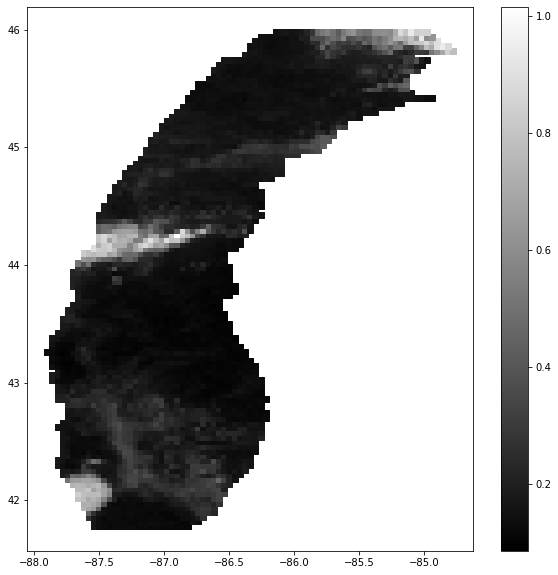

In [25]:
from array import array

image = arrays_2_png(lat_lst, lon_lst, daytime_df['Lake_data_1D'][13], 'sample')
image

Below is the Original satellite image.

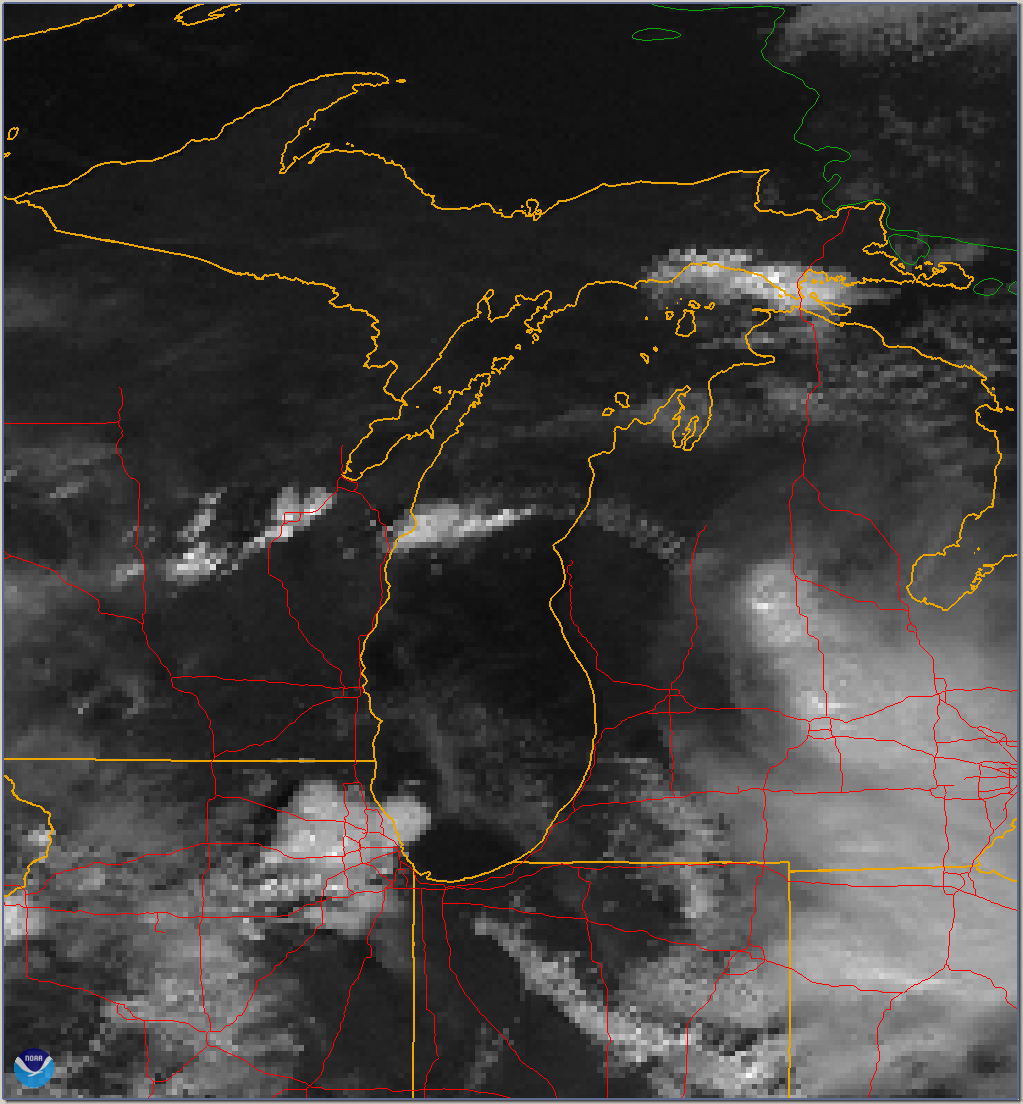

By comparing above 2 images we can surely tell that the data in ```Lake_data_1D``` is accurately mapping all the cloud points as the original satellite image.

Now by looking at above images we can see that there're significant clouds over the lake but the thick clouds percentage is only 5% as per the code above these images. 

So, let's create a new column ```Cloud_Exists```by keeping atleatst 10% of the area covered indicates 1 as cloud is present else 0.

In [26]:
daytime_df['LES_Cloud_Exists'] = 0

In [27]:
daytime_df['LES_Cloud_Exists']

0        0
1        0
2        0
3        0
4        0
        ..
18040    0
18041    0
18042    0
18043    0
18044    0
Name: LES_Cloud_Exists, Length: 18045, dtype: int64

Here we are changing the value of `LES_Cloud_Exists` if the cloud percentage is greater than 10% in the 1D image.

In [28]:
# Iterate through the 'Lake_data_1D' column
for i, arr in enumerate(daytime_df['Lake_data_1D']):
    # Count the number of values between 0.5 and 1 in the array
    count = sum(0.5 <= x < 1.0 for x in arr)
    # Calculate the percentage of values between 0.5 and 1 in the array
    percentage = count / len(arr)
    # Check if the percentage exceeds the threshold
    if percentage >= 0.1:
        # If it does, set the 'Cloud_Exists' column to 1
        daytime_df.at[i, 'LES_Cloud_Exists'] = 1
    else:
        # Otherwise, set it to 0
        daytime_df.at[i, 'LES_Cloud_Exists'] = 0

In [29]:
daytime_df['LES_Cloud_Exists'].value_counts()

0    13459
1     4586
Name: LES_Cloud_Exists, dtype: int64

In [30]:
daytime_df

,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),...,Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F),LES_Cloud_Exists
0,2006-10-01,08:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",48,92,46,0,...,m,m,10,993.0,1016.30,1015.90,0.00,NC,NC,0
1,2006-10-01,09:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",55,59,41,11,...,m,m,10,993.7,1016.90,1016.60,0.00,NC,NC,0
2,2006-10-01,10:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",55,61,42,10,...,m,m,10,994.3,1017.50,1017.30,0.00,NC,NC,0
3,2006-10-01,11:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",58,55,42,8,...,m,m,10,995.0,1018.00,1017.90,0.00,NC,NC,0
4,2006-10-01,12:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",56,59,42,10,...,m,m,10,995.0,1018.10,1017.90,0.00,NC,NC,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18040,2015-03-31,12:00,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",44.0,43.0,23.0,9,...,15000,25000,10,989.30,1012.70,1012.20,0.00,39,NC,1
18041,2015-03-31,13:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",44.0,39.0,21.0,8,...,7000,15000,10,989.00,1012.20,1011.90,0.00,39,NC,1
18042,2015-03-31,14:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",44.0,43.0,23.0,8,...,8000,13000,10,988.70,1012.10,1011.50,0.00,39,NC,1
18043,2015-03-31,15:00,goes15.2015.03.31.2100.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv,"[0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...","[array([ nan, nan, nan, nan, nan, nan, n...",40.0,52.0,24.0,7,...,m,m,10,988.70,1012.20,1011.50,0.00,35,NC,1


Now let's start exploring the meterological data

# Preprocessing

Let's start by dropping these columns:	```Time_CST```	```File_name_for_1D_lake```	```File_name_for_2D_lake```	```Lake_data_1D```	```Lake_data_2D```

In [31]:
new_df = daytime_df.drop(columns=['File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D'])
new_df

,Date_CST,Time_CST,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust(mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F),LES_Cloud_Exists
0,2006-10-01,08:00,48,92,46,0,0,m,3600,m,m,10,993.0,1016.30,1015.90,0.00,NC,NC,0
1,2006-10-01,09:00,55,59,41,11,300,m,3600,m,m,10,993.7,1016.90,1016.60,0.00,NC,NC,0
2,2006-10-01,10:00,55,61,42,10,300,m,3600,m,m,10,994.3,1017.50,1017.30,0.00,NC,NC,0
3,2006-10-01,11:00,58,55,42,8,290,m,3600,m,m,10,995.0,1018.00,1017.90,0.00,NC,NC,0
4,2006-10-01,12:00,56,59,42,10,260,m,3600,m,m,10,995.0,1018.10,1017.90,0.00,NC,NC,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18040,2015-03-31,12:00,44.0,43.0,23.0,9,20,m,2000,15000,25000,10,989.30,1012.70,1012.20,0.00,39,NC,1
18041,2015-03-31,13:00,44.0,39.0,21.0,8,30,m,3000,7000,15000,10,989.00,1012.20,1011.90,0.00,39,NC,1
18042,2015-03-31,14:00,44.0,43.0,23.0,8,40,m,4000,8000,13000,10,988.70,1012.10,1011.50,0.00,39,NC,1
18043,2015-03-31,15:00,40.0,52.0,24.0,7,30,m,9000,m,m,10,988.70,1012.20,1011.50,0.00,35,NC,1


Let's Visualise the type and values in the data

In [32]:
tabel = pd.DataFrame({
    'Unique':new_df.nunique(),
    'Null':new_df.isnull().sum(),
    'NullPercent':new_df.isnull().sum() / len(new_df),
    'NaNN':new_df.isna().sum(),
    'Type':new_df.dtypes.values
})
tabel

,Unique,Null,NullPercent,NaNN,Type
Date_CST,2005,0,0.000000,0,object
Time_CST,9,0,0.000000,0,object
Temp (F),198,91,0.005043,91,object
RH (%),165,91,0.005043,91,object
Dewpt (F),170,91,0.005043,91,object
Wind Spd (mph),28,91,0.005043,91,object
Wind Direction (deg),38,91,0.005043,91,object
Peak Wind Gust(mph),34,91,0.005043,91,object
Low Cloud Ht (ft),96,91,0.005043,91,object
Med Cloud Ht (ft),85,91,0.005043,91,object


**Non-numeric labels in meteorology data:**

Missing values are indicated by "M" and "m". When observations note specific values as missing, "M" is used. The "m" is used when there is a lack of information from the observation.

In [33]:
for col in new_df.columns:
  print(len(new_df[new_df[col].map(lambda x: x in ["m", "M", 'NC'])]), "For column : {}".format(col))

0 For column : Date_CST
0 For column : Time_CST
12 For column : Temp (F)
12 For column : RH (%)
8 For column : Dewpt (F)
52 For column : Wind Spd (mph)
1804 For column : Wind Direction (deg)
13703 For column : Peak Wind Gust(mph)
157 For column : Low Cloud Ht (ft)
8815 For column : Med Cloud Ht (ft)
15422 For column : High Cloud Ht (ft)
182 For column : Visibility (mi)
36 For column : Atm Press (hPa)
1070 For column : Sea Lev Press (hPa)
9 For column : Altimeter (hPa)
895 For column : Precip (in)
6033 For column : Wind Chill (F)
17894 For column : Heat Index (F)
0 For column : LES_Cloud_Exists


Let's drop the columns with most null values which are ```Peak Wind Gust(mph), Med Cloud Ht (ft), High Cloud Ht (ft), Heat Index (F), Wind Chill (F)```

In [34]:
new_df = new_df.drop(columns=['Peak Wind Gust(mph)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Heat Index (F)', 'Wind Chill (F)'])
new_df

,Date_CST,Time_CST,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Low Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),LES_Cloud_Exists
0,2006-10-01,08:00,48,92,46,0,0,3600,10,993.0,1016.30,1015.90,0.00,0
1,2006-10-01,09:00,55,59,41,11,300,3600,10,993.7,1016.90,1016.60,0.00,0
2,2006-10-01,10:00,55,61,42,10,300,3600,10,994.3,1017.50,1017.30,0.00,0
3,2006-10-01,11:00,58,55,42,8,290,3600,10,995.0,1018.00,1017.90,0.00,0
4,2006-10-01,12:00,56,59,42,10,260,3600,10,995.0,1018.10,1017.90,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18040,2015-03-31,12:00,44.0,43.0,23.0,9,20,2000,10,989.30,1012.70,1012.20,0.00,1
18041,2015-03-31,13:00,44.0,39.0,21.0,8,30,3000,10,989.00,1012.20,1011.90,0.00,1
18042,2015-03-31,14:00,44.0,43.0,23.0,8,40,4000,10,988.70,1012.10,1011.50,0.00,1
18043,2015-03-31,15:00,40.0,52.0,24.0,7,30,9000,10,988.70,1012.20,1011.50,0.00,1


## Imputation using Linear Interpolation

Linear interpolation is a method of estimating missing values in a dataset by filling in the gaps with values that lie on a straight line between neighboring data points. In pandas, linear interpolation can be performed using the interpolate() method.

To perform linear interpolation on a pandas DataFrame or Series, we can use the interpolate() method on the object and specify the method parameter as 'linear'. 

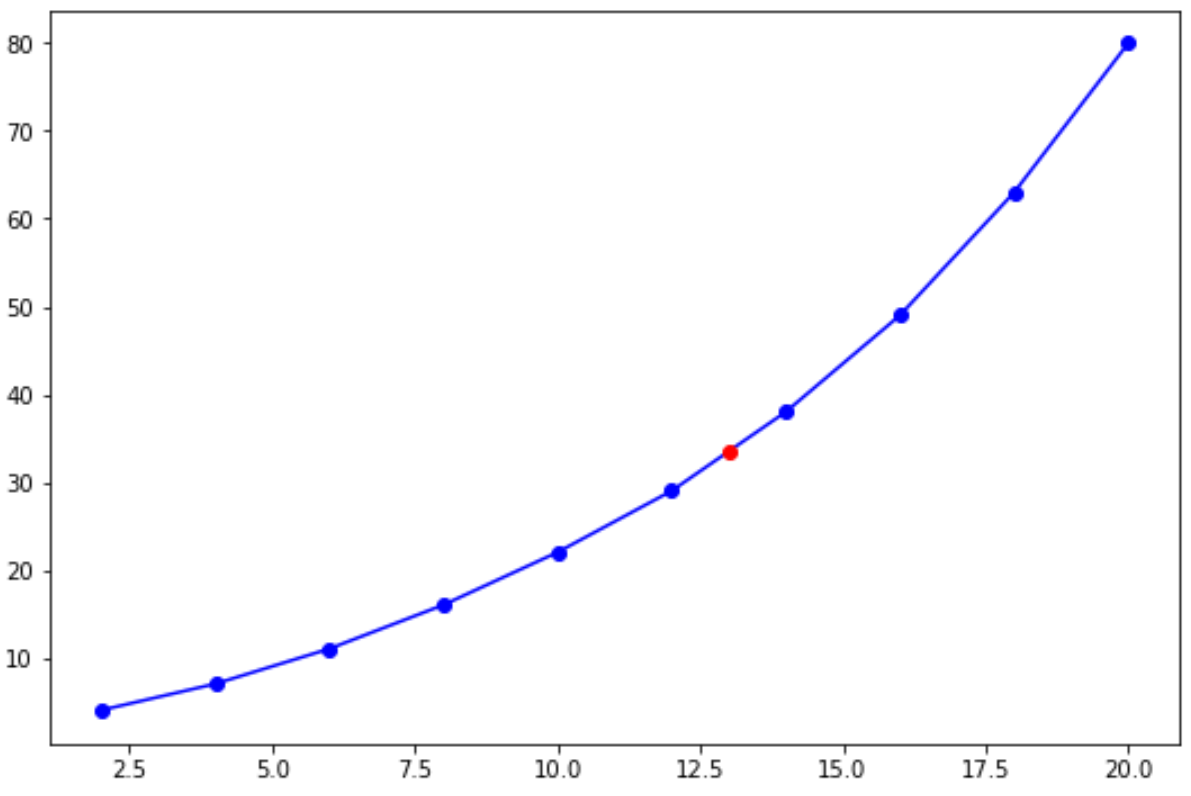

### Example:

In [35]:
from scipy.interpolate import lagrange
import pandas as pd
import numpy as np
# create a sample dataframe with missing values
linear_df = pd.DataFrame({'value1': [1, 4, np.nan, 7, 9, np.nan, np.nan, 8, 9, 10],
                   'value2': [5, 2, 3, 4, np.nan, np.nan, 3, 8, 9, np.nan]})

# fill missing values with polynomial interpolation
df_interpolated = linear_df.interpolate(method='linear', order=2)

# print the original dataframe and the interpolated dataframe
print("Original dataframe:")
print(linear_df)
print("Interpolated dataframe:")
print(df_interpolated)

Original dataframe:
   value1  value2
0     1.0     5.0
1     4.0     2.0
2     NaN     3.0
3     7.0     4.0
4     9.0     NaN
5     NaN     NaN
6     NaN     3.0
7     8.0     8.0
8     9.0     9.0
9    10.0     NaN
Interpolated dataframe:
      value1    value2
0   1.000000  5.000000
1   4.000000  2.000000
2   5.500000  3.000000
3   7.000000  4.000000
4   9.000000  3.666667
5   8.666667  3.333333
6   8.333333  3.000000
7   8.000000  8.000000
8   9.000000  9.000000
9  10.000000  9.000000


In [36]:
import pandas as pd

# define a function to convert a time string to a float representing the hour
def convert_time_to_float(time_str):
    time_obj = pd.to_datetime(time_str).time()
    return float(time_obj.hour)

# apply the function to the column and create a new column with the result
new_df['Time_CST'] = new_df['Time_CST'].apply(convert_time_to_float)

# display the result
print(new_df['Time_CST'])

0         8.0
1         9.0
2        10.0
3        11.0
4        12.0
         ... 
18040    12.0
18041    13.0
18042    14.0
18043    15.0
18044    16.0
Name: Time_CST, Length: 18045, dtype: float64


Now, lets interpolate our data, but before that we have data like `m`, `M`, `NC` which we need to convert to `nan` so that linear interpolate can work.
We also need to convert the data type to float.

In [37]:
new_df.replace(['m', 'M', 'NC'], np.nan, inplace=True)
new_df.iloc[:, 1:] = new_df.iloc[:, 1:].astype(float)

The interpolate() method is called on the new_df DataFrame with the argument option='linear'. This specifies that linear interpolation should be used to fill in any missing values in new_df. By default, the interpolate() method will apply the interpolation column-wise.

In [38]:
new_df = new_df.interpolate(option='linear')

In [39]:
new_df

,Date_CST,Time_CST,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Low Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),LES_Cloud_Exists
0,2006-10-01,8.0,48.0,92.0,46.0,0.0,0.0,3600.0,10.0,993.0,1016.3,1015.9,0.0,0.0
1,2006-10-01,9.0,55.0,59.0,41.0,11.0,300.0,3600.0,10.0,993.7,1016.9,1016.6,0.0,0.0
2,2006-10-01,10.0,55.0,61.0,42.0,10.0,300.0,3600.0,10.0,994.3,1017.5,1017.3,0.0,0.0
3,2006-10-01,11.0,58.0,55.0,42.0,8.0,290.0,3600.0,10.0,995.0,1018.0,1017.9,0.0,0.0
4,2006-10-01,12.0,56.0,59.0,42.0,10.0,260.0,3600.0,10.0,995.0,1018.1,1017.9,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18040,2015-03-31,12.0,44.0,43.0,23.0,9.0,20.0,2000.0,10.0,989.3,1012.7,1012.2,0.0,1.0
18041,2015-03-31,13.0,44.0,39.0,21.0,8.0,30.0,3000.0,10.0,989.0,1012.2,1011.9,0.0,1.0
18042,2015-03-31,14.0,44.0,43.0,23.0,8.0,40.0,4000.0,10.0,988.7,1012.1,1011.5,0.0,1.0
18043,2015-03-31,15.0,40.0,52.0,24.0,7.0,30.0,9000.0,10.0,988.7,1012.2,1011.5,0.0,1.0


We will again check how many null values we have in the dataset after the linear interpolation

In [40]:
tabel = pd.DataFrame({
    'Unique':new_df.nunique(),
    'Null':new_df.isnull().sum(),
    'NullPercent':new_df.isnull().sum() / len(new_df),
    'NaNN':new_df.isna().sum(),
    'Type':new_df.dtypes.values
})
tabel

,Unique,Null,NullPercent,NaNN,Type
Date_CST,2005,0,0.0,0,object
Time_CST,9,0,0.0,0,float64
Temp (F),196,0,0.0,0,float64
RH (%),177,0,0.0,0,float64
Dewpt (F),182,0,0.0,0,float64
Wind Spd (mph),143,0,0.0,0,float64
Wind Direction (deg),340,0,0.0,0,float64
Low Cloud Ht (ft),293,0,0.0,0,float64
Visibility (mi),54,0,0.0,0,float64
Atm Press (hPa),304,0,0.0,0,float64


As the null data is replaced with interpolated data, we can move ahead and add a new column `LES_Snowfall` to add if the snowfall happened in the particular hour or not.

first we will initialize the column data with 0 and then will change the value according to our conditions.

In [41]:
new_df['LES_Snowfall'] = 0

Checking how many row we will get once we apply the filter over the dataset to update the `LES_Snowfall` column.

In [42]:
filtered_df = new_df[(new_df['Temp (F)'] <= 33.0) & (new_df['Precip (in)'] > 0.0)]

# Print the filtered DataFrame
print(filtered_df)

         Date_CST  Time_CST  Temp (F)  RH (%)  Dewpt (F)  Wind Spd (mph)  \
102    2006-10-12      11.0      31.0    68.0       22.0            13.0   
392    2006-11-13      13.0      33.0    91.0       31.0             3.0   
441    2006-11-19       8.0      32.0    92.0       30.0             9.0   
442    2006-11-19       9.0      32.0    92.0       30.0             3.0   
550    2006-12-01       9.0      27.0    88.0       24.0            15.0   
...           ...       ...       ...     ...        ...             ...   
17787  2015-03-03      11.0      25.0    80.0       20.0             8.0   
17788  2015-03-03      12.0      25.0    84.0       21.0             6.0   
17789  2015-03-03      13.0      25.0    85.0       21.0             6.0   
17790  2015-03-03      14.0      27.0    88.0       24.0             7.0   
18024  2015-03-29      14.0      33.0    84.0       29.0            11.0   

       Wind Direction (deg)  Low Cloud Ht (ft)  Visibility (mi)  \
102              260

we are getting that 510 rows will have the `LES_Snowfall` as 1 that means snow occured.
Lets change the column. The values in this column will be 1 for rows where the temperature is less than or equal to 33.0 degrees Fahrenheit and the precipitation is greater than 0.0 inches.

In [43]:
new_df.loc[(new_df['Temp (F)'] <= 33.0) & (new_df['Precip (in)'] > 0.0) , "LES_Snowfall"] = 1

count the number of occurrences of each unique value in the "LES_Snowfall" column of the DataFrame "new_df". The output will show the count of rows where "LES_Snowfall" is equal to 1, as well as the count of rows where it is equal to 0.

In [44]:
new_df['LES_Snowfall'].value_counts()

0    17535
1      510
Name: LES_Snowfall, dtype: int64

We can see that we have 17535 columns with 0 value and 510 columns with 1 value indicating imbalance in dependent class variables.

The data is extremely unbalanced which will cause the problem will fitting the model. For that we are using to approach as:
- `LES_Snowfall` = 1 denotes that if we learn that snow fell at any time throughout the day, we shall label each hour of the day as having experienced snow. This will enable us to forecast the days in the future when snow will fall.


First create an empty set called "dct". Then, it loops through each row in the DataFrame "new_df" using the "iterrows()" method. For each row, it checks if the value in the "LES_Snowfall" column is equal to 1. If it is, then it adds the value in the "Date_CST" column to the "dct" set.

Next, it loops through each value in the "dct" set, and for each value, it sets the value in the "LES_Snowfall" column to 1 for all rows in the DataFrame where the value in the "Date_CST" column matches the current value in the loop.

Finally, it uses the "value_counts()" method to count the number of occurrences of each unique value in the "LES_Snowfall" column, which should now have been updated based on the values in the "dct" set.

In [45]:
dct = set()
for index, row in new_df.iterrows():
  if row["LES_Snowfall"] == 1:
    dct.add(row["Date_CST"])

for date in dct:
  new_df.loc[new_df['Date_CST'].eq(date),'LES_Snowfall']=1

new_df['LES_Snowfall'].value_counts()

0    16047
1     1998
Name: LES_Snowfall, dtype: int64

**Let's make a copy of the ```new_df``` before converting to daily data** 

In [46]:
daily_df = new_df.copy()

We must delete the columns from which the dependant column was derived now that it has been created. So, we will drop `Temp (F)`, `Precip (in)`.

In [47]:
new_df = new_df.drop(columns=['Time_CST','Temp (F)' ,'Precip (in)'])

Now lets convert the data on day basis by grouping the data with `Date_CST` column and mean all the values on that day.

In [48]:
new_df = new_df.groupby("Date_CST").mean()
new_df['LES_Snowfall'].value_counts()

0.0    1783
1.0     222
Name: LES_Snowfall, dtype: int64

Currently, there have been 222 days with snow and 1783 days without it.

# Correlation Matrix

To see how our columns relate to one another, we'll plot the correlation matrix.

This code is creating a heatmap visualization of the correlation matrix for the DataFrame "new_df" using the seaborn library.

The "plt.subplots(figsize=(30,20))" line sets the figure size for the plot to be 30 inches wide by 20 inches tall, which is quite large.

The "sns.heatmap(new_df.corr(), annot=True)" line creates the heatmap itself. The "new_df.corr()" portion calculates the correlation matrix for all numerical columns in the DataFrame, and the "sns.heatmap()" function displays the matrix as a color-coded grid. The "annot=True" argument adds numeric values to the heatmap cells to indicate the exact correlation coefficient for each pair of variables.

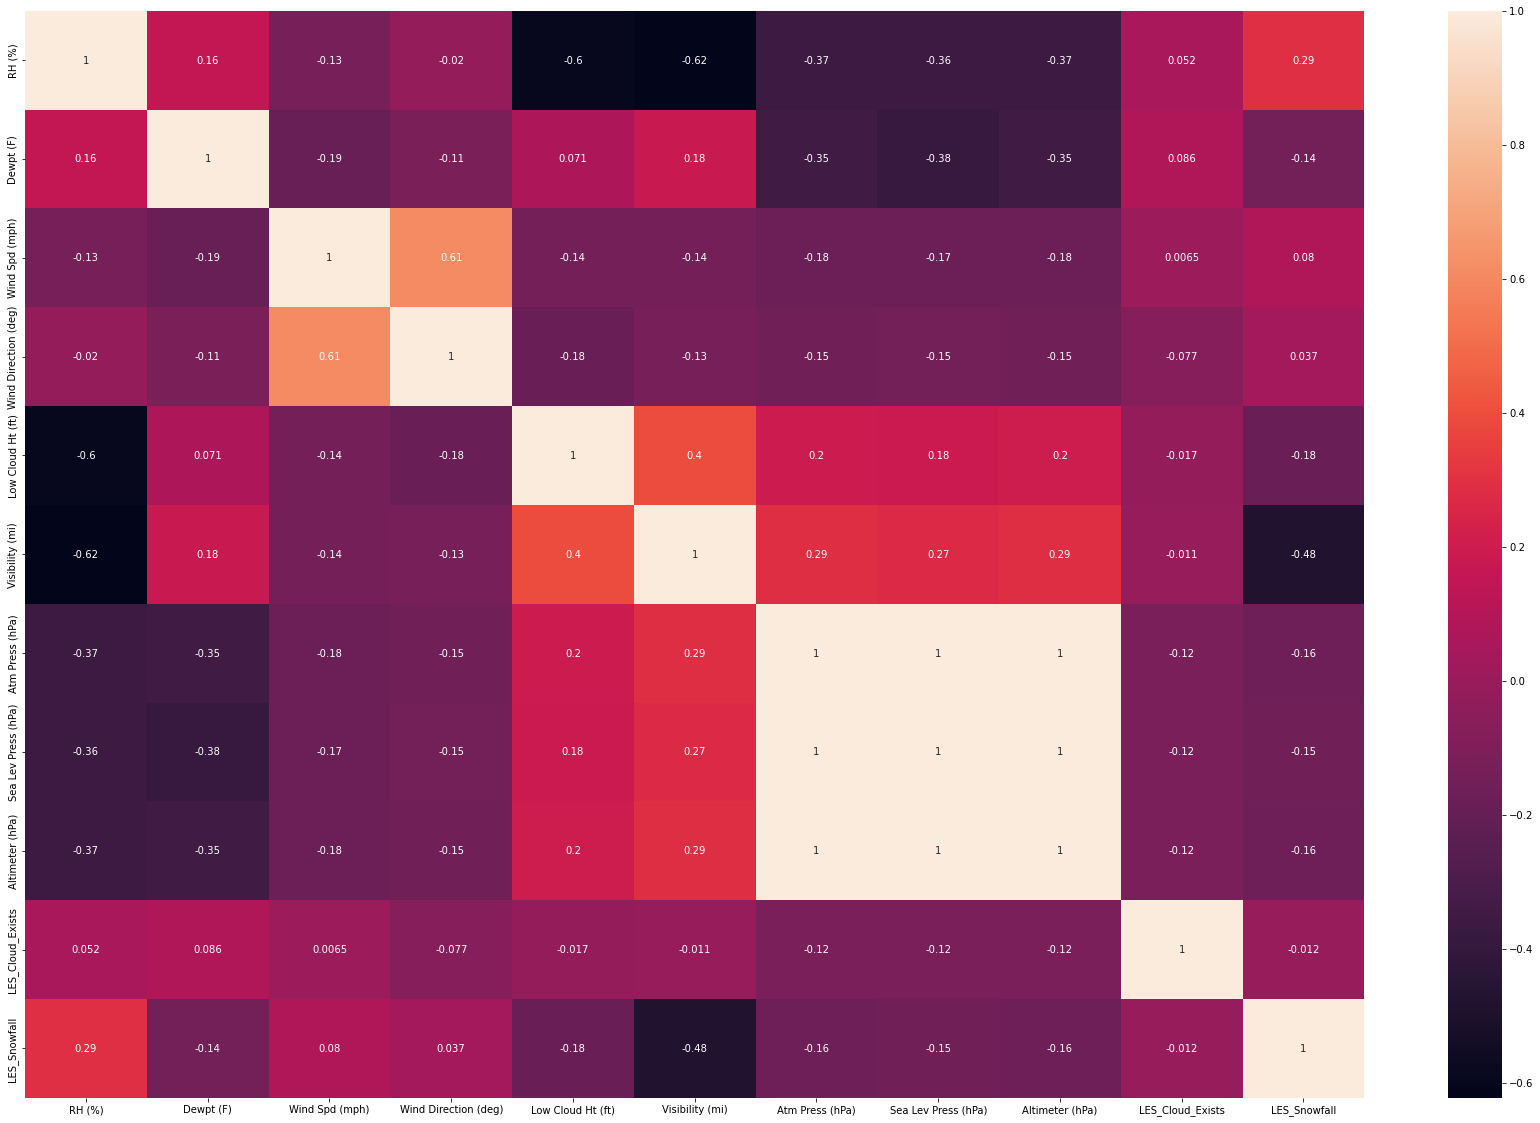

In [49]:
plt.subplots(figsize=(30,20))
sns.heatmap(new_df.corr(), annot=True)
plt.show()

Here, we have some columns which are highly correlated. We will remove columns which as the correlation above 0.80.

matrix "upper_tri" is a masked correlation matrix that only includes the upper triangle of the original correlation matrix. This can be useful for focusing on the correlations between pairs of variables that are most strongly correlated, without cluttering the output with redundant or irrelevant information.


In [50]:
cor_matrix = new_df.corr().abs()

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

Checking the columns which will be dropped from the dataset

In [51]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.80)]
print(to_drop)

['Sea Lev Press (hPa)', 'Altimeter (hPa)']


Dropping the columns which are highly correlated from the dataset.

In [52]:
new_df = new_df.drop(columns = to_drop, axis=1)
new_df.head()

,RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Low Cloud Ht (ft),Visibility (mi),Atm Press (hPa),LES_Cloud_Exists,LES_Snowfall
Date_CST,,,,,,,,,
2006-10-01,58.888889,42.222222,7.444444,212.777778,2822.222222,10.0,994.422222,0.000000,0.0
2006-10-02,58.666667,56.666667,9.888889,215.000000,3944.444444,10.0,990.244444,0.333333,0.0
2006-10-03,79.777778,57.444444,5.666667,71.111111,3700.000000,7.0,995.266667,0.000000,0.0
2006-10-04,70.111111,45.555556,13.111111,131.111111,2366.666667,10.0,998.422222,0.555556,0.0
2006-10-05,54.333333,35.666667,7.000000,95.555556,3188.888889,10.0,1006.155556,0.000000,0.0


# Visualising features to check the feature imporatnce on dependent variable(LES_snowfall) 

Create a kernel density estimate (KDE) plot for each numerical column in the DataFrame "new_df", except for the "LES_Snowfall" column.

The output is a series of KDE plots, one for each numerical column in the DataFrame (excluding "LES_Snowfall"). The plots show the distribution of the variable, with one curve for rows where "LES_Snowfall" is 0 and another curve for rows where "LES_Snowfall" is 1. These plots can be useful for visually identifying any differences in the distributions of the variables between the two groups.

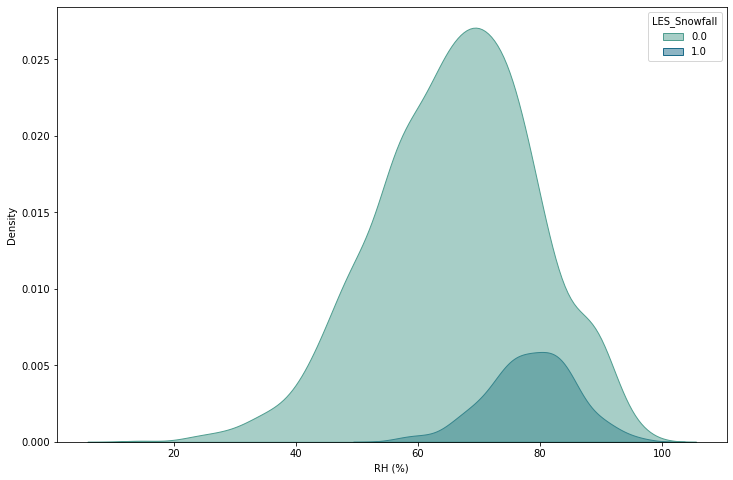

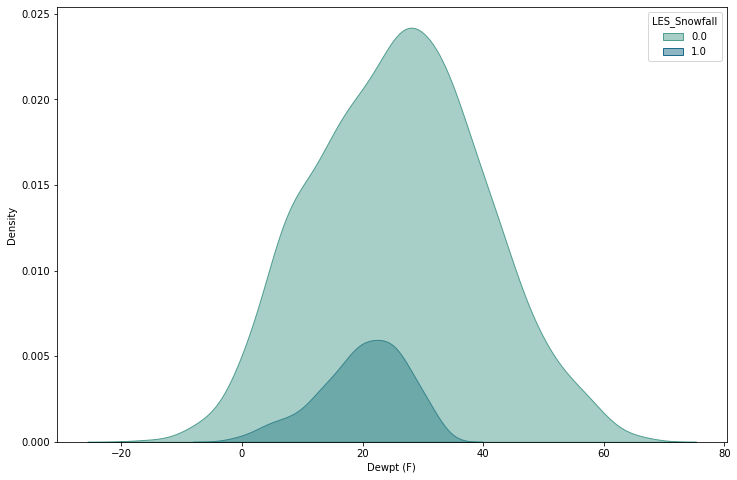

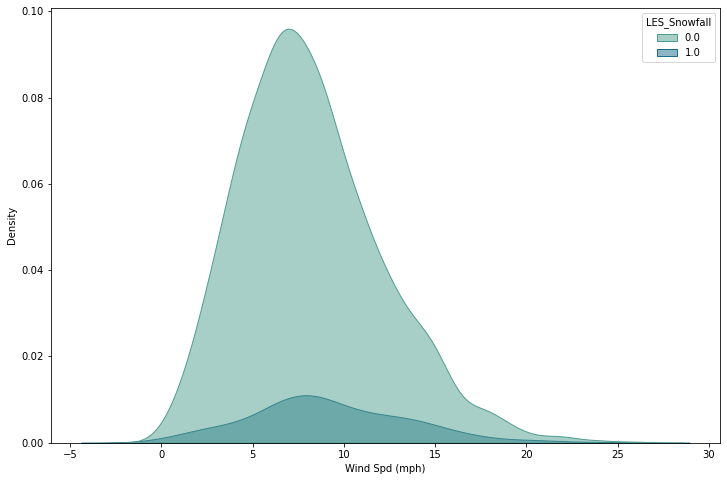

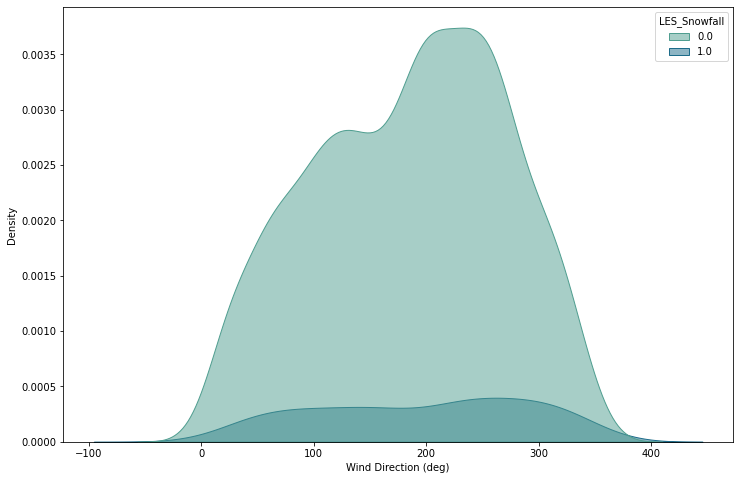

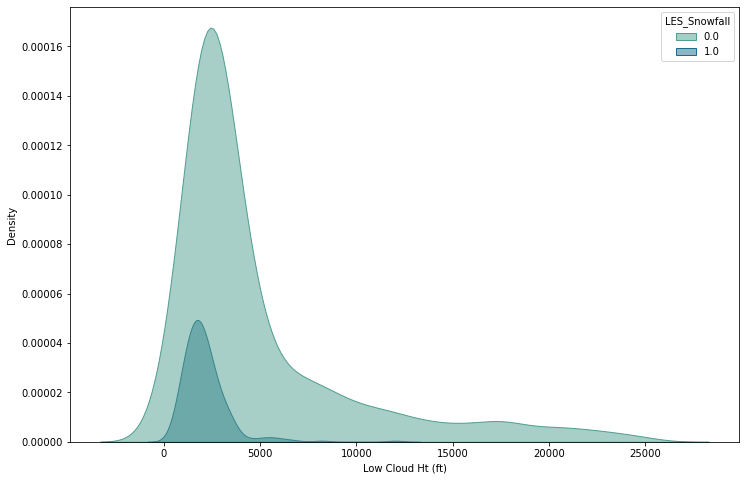

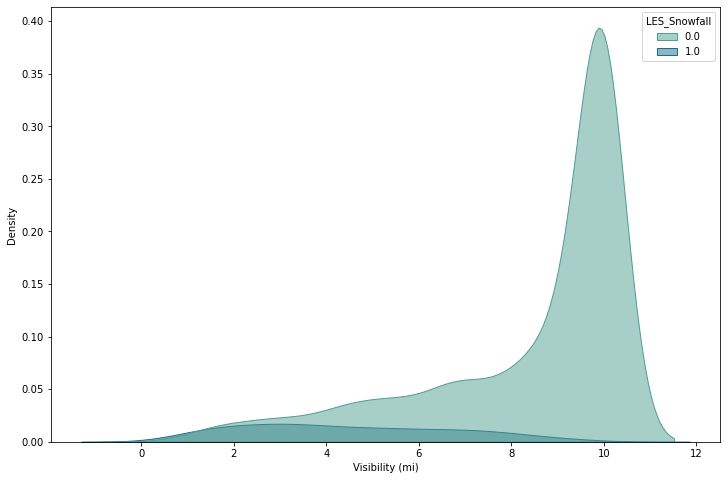

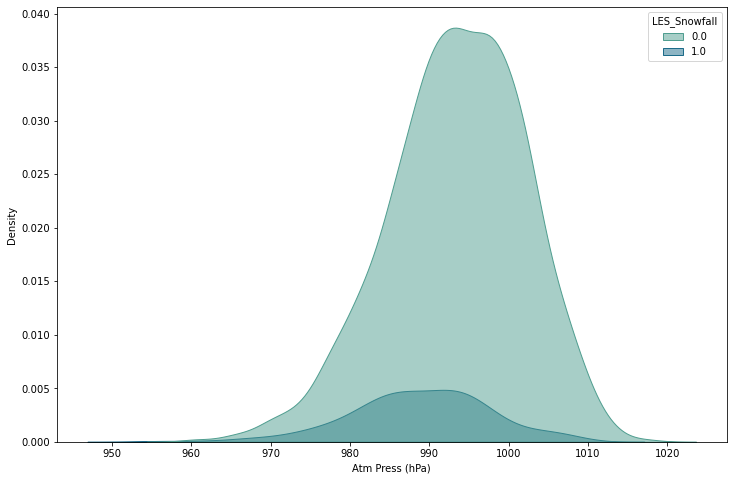

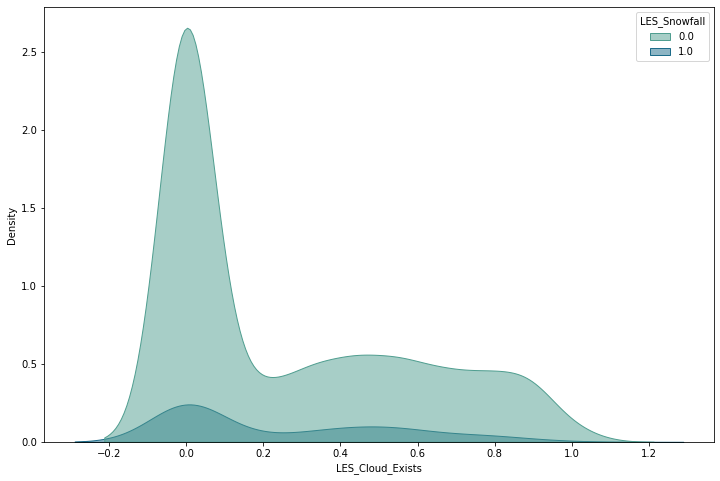

In [53]:
for column in new_df:
    if column != 'LES_Snowfall':
      plt.figure(figsize=(12,8))
      sns.kdeplot(data=new_df, x=column, hue="LES_Snowfall", fill=True, alpha=.5, palette="crest")
      plt.show()

# Model Fitting

- We must divide the data into test and train sets and move the data to obtain future dates in order to create a more accurate prediction model.

- We will change the data for the three-day forecast.

this code is useful for analyzing the impact of snowfall on weather conditions three days later by shifting the "LES_Snowfall" values to align with the appropriate day in the dataset.

In [54]:
new_df['LES_Snowfall'] = new_df.shift(3)['LES_Snowfall']
new_df=new_df.dropna(subset=["LES_Snowfall"])
new_df

,RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Low Cloud Ht (ft),Visibility (mi),Atm Press (hPa),LES_Cloud_Exists,LES_Snowfall
Date_CST,,,,,,,,,
2006-10-04,70.111111,45.555556,13.111111,131.111111,2366.666667,10.000000,998.422222,0.555556,0.0
2006-10-05,54.333333,35.666667,7.000000,95.555556,3188.888889,10.000000,1006.155556,0.000000,0.0
2006-10-06,47.666667,35.333333,4.777778,86.481481,0.000000,10.000000,1009.044444,0.000000,0.0
2006-10-07,44.888889,39.333333,7.444444,204.074074,0.000000,10.000000,1003.511111,0.000000,0.0
2006-10-08,38.222222,40.555556,11.444444,208.888889,0.000000,10.000000,996.188889,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
2017-03-27,88.777778,35.777778,4.444444,120.000000,655.555556,6.666667,990.566667,0.888889,0.0
2017-03-28,77.888889,34.777778,7.555556,55.555556,4350.000000,7.888889,997.877778,0.888889,0.0
2017-03-29,80.000000,32.222222,5.111111,62.222222,7455.555556,6.222222,1003.500000,0.888889,0.0


We can use either an oversampling or an undersampling strategy to balance the data because it is severely uneven.

We shall use over sampling because we have a limited amount of data.

We are using the SMOTE (Synthetic Minority Over-sampling Technique) algorithm from the "imblearn" library to balance the distribution of the "LES_Snowfall" target variable.
This is useful for handling imbalanced datasets, where one class (in this case, "LES_Snowfall" values of 1) is significantly underrepresented compared to the other class. The SMOTE algorithm helps to create a more balanced dataset by generating synthetic samples of the minority class.

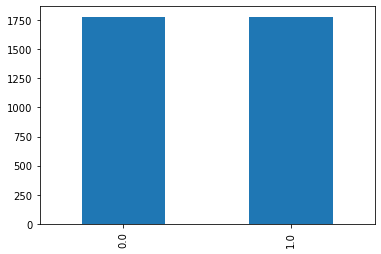

In [55]:
from imblearn.over_sampling import SMOTE

features = new_df.drop(columns='LES_Snowfall')
target = new_df['LES_Snowfall']

smote = SMOTE()
features, targets = smote.fit_resample(features, target)
ros_chd_plot=targets.value_counts().plot(kind='bar')
plt.show()

In [76]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
from sklearn.model_selection import train_test_split

#Scaling the data
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, targets, test_size=0.3, random_state=30)

# Reshape input data into 3D array [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, features.shape[1]), activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(40, activation='relu', return_sequences=True))
model.add(LSTM(30, activation='relu', return_sequences=True))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=2, batch_size=8)


Epoch 1/300
312/312 - 4s - loss: 0.6930 - accuracy: 0.5020 - val_loss: 0.6849 - val_accuracy: 0.4888 - 4s/epoch - 13ms/step
Epoch 2/300
312/312 - 1s - loss: 0.6369 - accuracy: 0.6276 - val_loss: 0.6160 - val_accuracy: 0.6620 - 526ms/epoch - 2ms/step
Epoch 3/300
312/312 - 1s - loss: 0.5946 - accuracy: 0.6730 - val_loss: 0.5989 - val_accuracy: 0.6835 - 516ms/epoch - 2ms/step
Epoch 4/300
312/312 - 1s - loss: 0.5840 - accuracy: 0.6786 - val_loss: 0.5769 - val_accuracy: 0.6957 - 517ms/epoch - 2ms/step
Epoch 5/300
312/312 - 1s - loss: 0.5751 - accuracy: 0.6870 - val_loss: 0.5654 - val_accuracy: 0.7135 - 510ms/epoch - 2ms/step
Epoch 6/300
312/312 - 1s - loss: 0.5736 - accuracy: 0.6934 - val_loss: 0.5641 - val_accuracy: 0.7154 - 540ms/epoch - 2ms/step
Epoch 7/300
312/312 - 1s - loss: 0.5682 - accuracy: 0.6966 - val_loss: 0.5582 - val_accuracy: 0.7228 - 539ms/epoch - 2ms/step
Epoch 8/300
312/312 - 1s - loss: 0.5603 - accuracy: 0.7014 - val_loss: 0.5618 - val_accuracy: 0.7350 - 544ms/epoch - 2ms

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 1, 64)             18688     
                                                                 
 lstm_13 (LSTM)              (None, 1, 50)             23000     
                                                                 
 lstm_14 (LSTM)              (None, 1, 40)             14560     
                                                                 
 lstm_15 (LSTM)              (None, 1, 30)             8520      
                                                                 
 dense_3 (Dense)             (None, 1, 1)              31        
                                                                 
Total params: 64,799
Trainable params: 64,799
Non-trainable params: 0
_________________________________________________________________


In [77]:
import pickle
filename = 'model_daily.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_3
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
........

# Model 2

Building the model for hourly basis data.

Removing the features tha are correlated. 

In [61]:
daily_df = daily_df.drop(columns=['Temp (F)', 'Precip (in)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)'])

In [62]:
daily_df = daily_df.set_index('Date_CST')
daily_df

,Time_CST,RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Low Cloud Ht (ft),Visibility (mi),Atm Press (hPa),LES_Cloud_Exists,LES_Snowfall
Date_CST,,,,,,,,,,
2006-10-01,8.0,92.0,46.0,0.0,0.0,3600.0,10.0,993.0,0.0,0
2006-10-01,9.0,59.0,41.0,11.0,300.0,3600.0,10.0,993.7,0.0,0
2006-10-01,10.0,61.0,42.0,10.0,300.0,3600.0,10.0,994.3,0.0,0
2006-10-01,11.0,55.0,42.0,8.0,290.0,3600.0,10.0,995.0,0.0,0
2006-10-01,12.0,59.0,42.0,10.0,260.0,3600.0,10.0,995.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2015-03-31,12.0,43.0,23.0,9.0,20.0,2000.0,10.0,989.3,1.0,0
2015-03-31,13.0,39.0,21.0,8.0,30.0,3000.0,10.0,989.0,1.0,0
2015-03-31,14.0,43.0,23.0,8.0,40.0,4000.0,10.0,988.7,1.0,0


In [63]:
daily_df['LES_Snowfall'] = daily_df.shift(24)['LES_Snowfall']
daily_df = daily_df.dropna(subset=["LES_Snowfall"])
daily_df

,Time_CST,RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Low Cloud Ht (ft),Visibility (mi),Atm Press (hPa),LES_Cloud_Exists,LES_Snowfall
Date_CST,,,,,,,,,,
2006-10-03,14.0,67.0,58.0,6.0,30.0,5000.0,10.0,994.3,0.0,0.0
2006-10-03,15.0,72.0,57.0,8.0,20.0,5000.0,10.0,994.7,0.0,0.0
2006-10-03,16.0,83.0,56.0,9.0,20.0,5000.0,10.0,994.3,0.0,0.0
2006-10-04,8.0,83.0,50.0,11.0,30.0,1400.0,10.0,994.3,0.0,0.0
2006-10-04,9.0,83.0,50.0,9.0,360.0,1800.0,10.0,995.3,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2015-03-31,12.0,43.0,23.0,9.0,20.0,2000.0,10.0,989.3,1.0,0.0
2015-03-31,13.0,39.0,21.0,8.0,30.0,3000.0,10.0,989.0,1.0,0.0
2015-03-31,14.0,43.0,23.0,8.0,40.0,4000.0,10.0,988.7,1.0,1.0


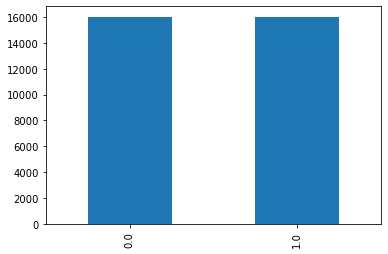

In [64]:
from imblearn.over_sampling import SMOTE

features1 = daily_df.drop(columns='LES_Snowfall')
target1 = daily_df['LES_Snowfall']

smote1 = SMOTE()
features1, targets1 = smote1.fit_resample(features1, target1)
ros_chd_plot1 = targets1.value_counts().plot(kind='bar')
plt.show()

In [65]:
features1.shape, targets1.shape

((32058, 9), (32058,))

In [74]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np
from sklearn.model_selection import train_test_split

#Scaling the data
scaler1 = MinMaxScaler()
features_scaled1 = scaler1.fit_transform(features1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled1, targets1, test_size=0.3, random_state=30)

# Reshape input data into 3D array [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model1 = Sequential()
model1.add(LSTM(64, input_shape=(1, features1.shape[1]), activation='relu', return_sequences=True))
model1.add(LSTM(50, activation='relu', return_sequences=True))
model1.add(LSTM(40, activation='relu', return_sequences=True))
model1.add(LSTM(10, activation='relu', return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))
# Compile model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model1.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=2, batch_size=64)


Epoch 1/200
351/351 - 3s - loss: 0.6472 - accuracy: 0.5930 - val_loss: 0.5630 - val_accuracy: 0.7093 - 3s/epoch - 10ms/step
Epoch 2/200
351/351 - 1s - loss: 0.5529 - accuracy: 0.7155 - val_loss: 0.5240 - val_accuracy: 0.7353 - 771ms/epoch - 2ms/step
Epoch 3/200
351/351 - 1s - loss: 0.5225 - accuracy: 0.7333 - val_loss: 0.5016 - val_accuracy: 0.7465 - 771ms/epoch - 2ms/step
Epoch 4/200
351/351 - 1s - loss: 0.5003 - accuracy: 0.7410 - val_loss: 0.4876 - val_accuracy: 0.7462 - 768ms/epoch - 2ms/step
Epoch 5/200
351/351 - 1s - loss: 0.4878 - accuracy: 0.7462 - val_loss: 0.4802 - val_accuracy: 0.7509 - 769ms/epoch - 2ms/step
Epoch 6/200
351/351 - 1s - loss: 0.4808 - accuracy: 0.7474 - val_loss: 0.4741 - val_accuracy: 0.7572 - 766ms/epoch - 2ms/step
Epoch 7/200
351/351 - 1s - loss: 0.4764 - accuracy: 0.7535 - val_loss: 0.4640 - val_accuracy: 0.7595 - 766ms/epoch - 2ms/step
Epoch 8/200
351/351 - 1s - loss: 0.4701 - accuracy: 0.7538 - val_loss: 0.4657 - val_accuracy: 0.7609 - 759ms/epoch - 2ms

In [75]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_64 (LSTM)              (None, 1, 64)             18944     
                                                                 
 lstm_65 (LSTM)              (None, 1, 50)             23000     
                                                                 
 lstm_66 (LSTM)              (None, 1, 40)             14560     
                                                                 
 lstm_67 (LSTM)              (None, 1, 10)             2040      
                                                                 
 dense_12 (Dense)            (None, 1, 1)              11        
                                                                 
Total params: 58,555
Trainable params: 58,555
Non-trainable params: 0
_________________________________________________________________


In [78]:

filename = 'model_hourly.sav'
pickle.dump(model, open(filename, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_3
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
........

## Conclusion:

* We created 2 models where in 1st model takes data on daily basis & 2nd model takes hourly data to predict snowfall
* The model with daily data performed well on training set with around 92% accuracy
* Model 2 overall performed same on both the test and train sets at around 82% accuracy, as the data is more and thereby more convergence
* Both the models predicted the snowfall 3 days in advance
* LSTM (RNN) is great at recognising long term pattern and dependencies of data thereby providing accurate results 